In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fear_greed_df = pd.read_csv('fear_greed_index.csv')
treader_df = pd.read_csv('historical_data.csv')

In [3]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
treader_df['Timestamp IST'] = pd.to_datetime(
        treader_df['Timestamp IST'],
        format = '%d-%m-%Y %H:%M',
        errors = 'coerce'
    )
treader_df['date'] = treader_df['Timestamp IST'].dt.date
treader_df['date'] = pd.to_datetime(treader_df['date'])
treader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [5]:
daily_metrics = treader_df.groupby('date').agg({
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'Execution Price': 'mean',
    'Fee': 'sum',
    'Order ID': 'count'
}).rename(columns={
    'Closed PnL': 'Total PnL',
    'Size USD': 'Total Volume USD',
    'Execution Price': 'Avg Execution price',
    'Fee': 'Total Fees',
    'Order ID': 'Number of Treads'
}).reset_index()

In [6]:
daily_metrics.head()

,date,Total PnL,Total Volume USD,Avg Execution price,Total Fees,Number of Treads
0,2023-05-01,0.000000,477.00,1898.133333,0.000000,3
1,2023-12-05,0.000000,50005.83,11038.300000,12.501455,9
2,2023-12-14,-205.434737,113203.35,8031.868818,28.300831,11
3,2023-12-15,-24.632034,10609.95,2.982000,2.652489,2
4,2023-12-16,0.000000,15348.77,0.384707,3.837189,3


In [7]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
merged_df = pd.merge(daily_metrics,fear_greed_df[['date','value','classification']], on='date', how='inner')

In [9]:
merged_df.head()

,date,Total PnL,Total Volume USD,Avg Execution price,Total Fees,Number of Treads,value,classification
0,2023-05-01,0.000000,477.00,1898.133333,0.000000,3,63,Greed
1,2023-12-05,0.000000,50005.83,11038.300000,12.501455,9,75,Extreme Greed
2,2023-12-14,-205.434737,113203.35,8031.868818,28.300831,11,72,Greed
3,2023-12-15,-24.632034,10609.95,2.982000,2.652489,2,70,Greed
4,2023-12-16,0.000000,15348.77,0.384707,3.837189,3,67,Greed


In [10]:
corr = merged_df[['Total PnL', 'Total Volume USD', 'Avg Execution price', 'Total Fees', 'Number of Treads', 'value']].corr()


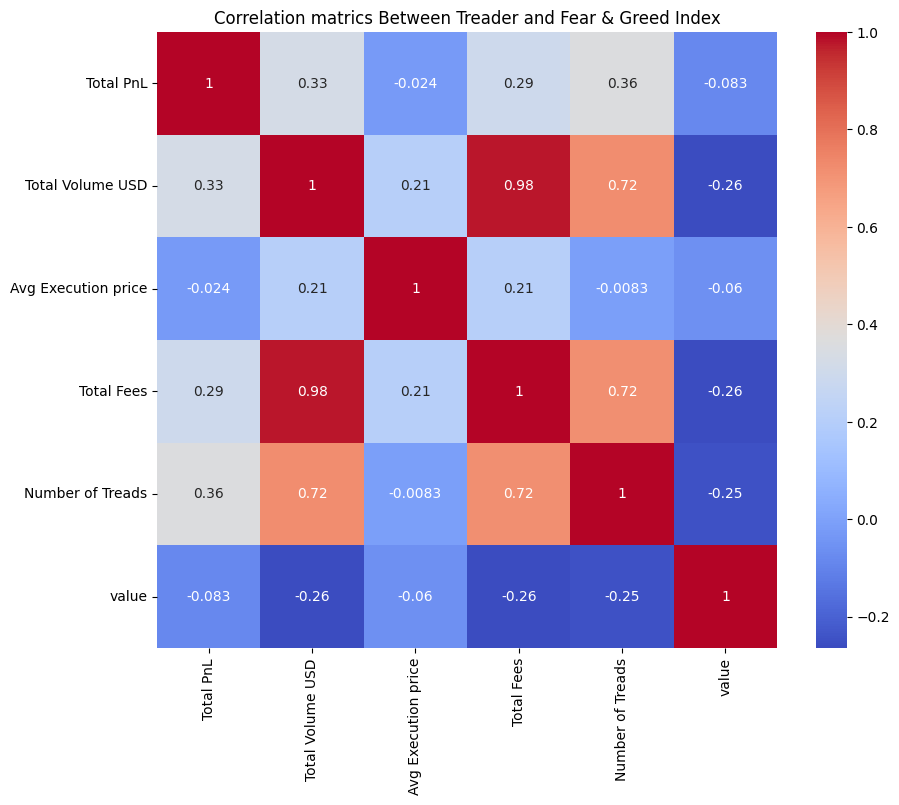

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrics Between Treader and Fear & Greed Index')
plt.show()

/tmp/ipython-input-12-1183257173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Total PnL', palette='Set2')
/tmp/ipython-input-12-1183257173.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Total Volume USD', palette='Set3')


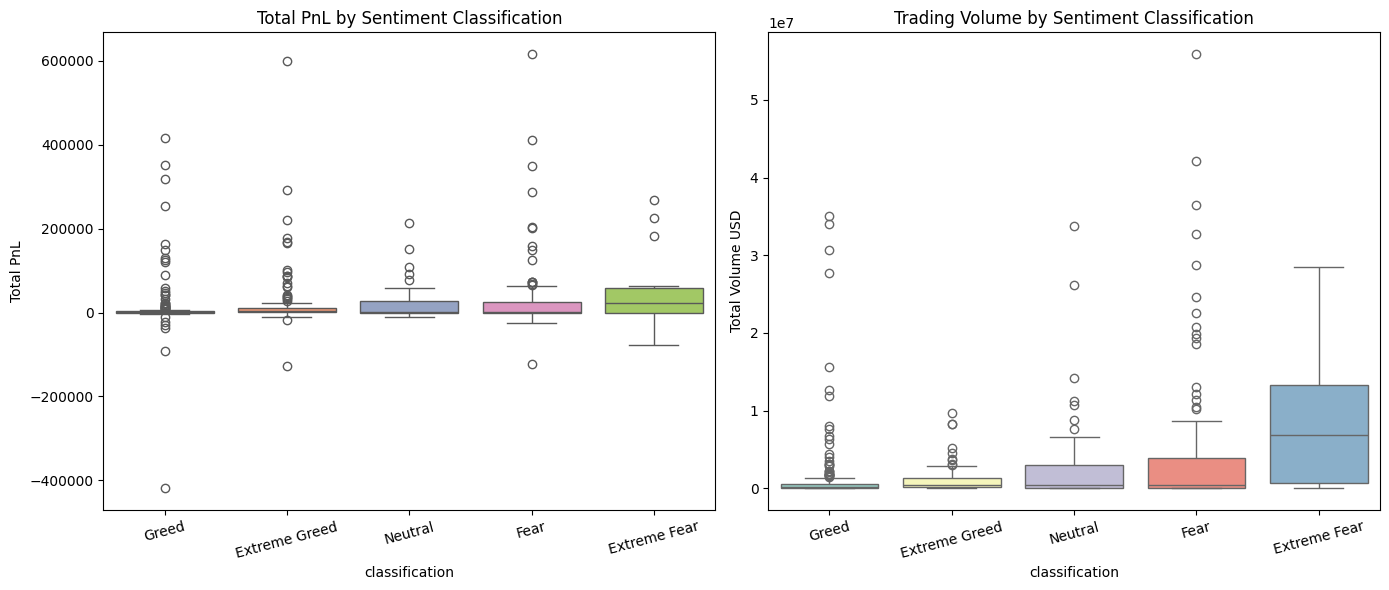

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=merged_df, x='classification', y='Total PnL', palette='Set2')
plt.title('Total PnL by Sentiment Classification')
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df, x='classification', y='Total Volume USD', palette='Set3')
plt.title('Trading Volume by Sentiment Classification')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()
plt.show()

In [13]:
merged_df.to_csv('merged_trading_sentiment_data.csv', index=False)